# Merge JSON files

In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [31]:
years=[2000,2001]
files_combined=[]

In [32]:
for YEAR in years:
    JSON_FILE = f'Data/tmdb_api_results_{YEAR}.json'
    with open(JSON_FILE, 'r') as file:
            files_combined.extend(json.load(file))

In [49]:
 with open('Data/tmdb_results_combined.csv.gz', 'w') as output_file:
        json.dump(files_combined, output_file)

In [33]:
len(files_combined)

2492

In [34]:
df=pd.DataFrame(files_combined)

In [35]:
df.shape

(2492, 26)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2492 non-null   object 
 1   adult                  2490 non-null   object 
 2   backdrop_path          1290 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2490 non-null   float64
 5   genres                 2490 non-null   object 
 6   homepage               2490 non-null   object 
 7   id                     2490 non-null   float64
 8   original_language      2490 non-null   object 
 9   original_title         2490 non-null   object 
 10  overview               2490 non-null   object 
 11  popularity             2490 non-null   float64
 12  poster_path            2195 non-null   object 
 13  production_companies   2490 non-null   object 
 14  production_countries   2490 non-null   object 
 15  rele

In [37]:
filter_revenue=df['revenue']>0
filter_budget=df['budget']>0
df_filtered=df[filter_revenue|filter_budget]

In [38]:
df_filtered.shape

(619, 26)

# EDA

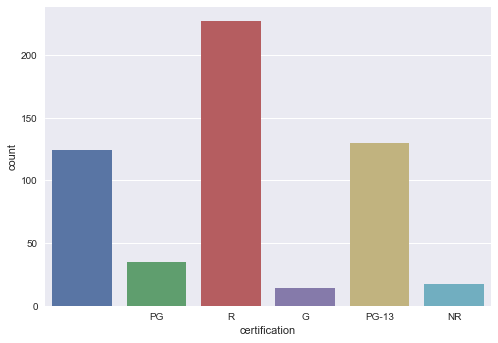

In [41]:
sns.countplot(data=df_filtered,x='certification');

#Movies per certification category


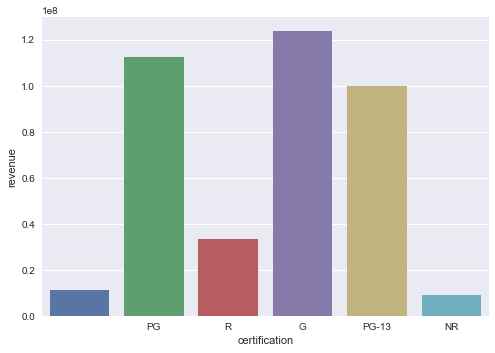

In [45]:
sns.barplot(data=df_filtered,x='certification',y='revenue',ci=None);

#Average Revenue per Certification

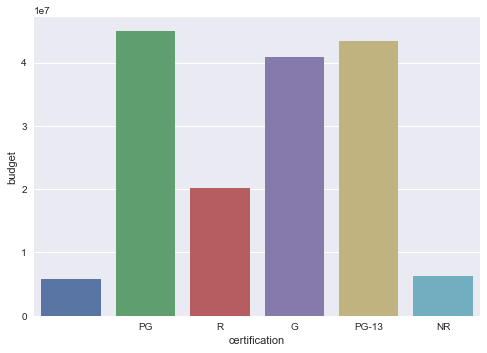

In [46]:
sns.barplot(data=df_filtered,x='certification',y='budget',ci=None);

#Average Budget per Certification

In [48]:
df_filtered.groupby('certification',dropna=False)['revenue','budget'].mean()

C:\Users\JoseH\AppData\Local\Temp\ipykernel_6528\763420654.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_filtered.groupby('certification',dropna=False)['revenue','budget'].mean()


,revenue,budget
certification,,
,1.114918e+07,5.830014e+06
G,1.237085e+08,4.085714e+07
NR,8.887619e+06,6.300006e+06
PG,1.123378e+08,4.497857e+07
PG-13,9.970084e+07,4.348391e+07
R,3.334614e+07,2.013149e+07
NaN,2.951131e+06,2.002770e+06
